# Newbies Project:   Is there a Correlation Between the Credit Card Fraud Incident Rate and Victim’s Age Group, Spending Size, Demographics, and Time of Transaction?

## Objective
* Analyze the fraud data set to determine correlation between fraud incidence, spending size, age group, demographics and time of transaction so awareness campaigns can be directed to these groups.  Perform other relevant analysis from the data set.

* Statement: There is no correlation between the spending size, age group, demographics and time of transaction vs. fraud incidence.

## Hypothesis
* Ha = There is strong positive correlation between the spending size, age group, demographics and time of transaction and fraud incidence.
* Hb = There is strong negative correlation between the spending spending size, age group, demographics and time of transaction and fraud incidence.
* Ho = There is no correlation between the spending size, age group, demographics and time of transaction and fraud incidence.

## Sources
* Kaggle: https://www.kaggle.com/datasets/kartik2112/fraud-detection

## Results
* There is no correlation between the victim's average spending size and fraud incidence.  This result does make sense whereby fraudsters are usually unaware of the credit card users spending activity.  The user's spending activity is not a public information available.
* Our analysis showed that the incidence rate for age groups 58-100 yrs. old (Boomers, Post-War and WWII) are higher making them more susceptible victims of credit card fraud. In a general sense, users at this age tend to be more trusting and forgetful, making them more vulnerable.
* The is a strong correlation between state population size and fraud incidence.  States with higher population tend to have higher credit card fraud incident rates.  Our analysis also showed weak correlation on victim's socio economic status (poverty rate, unemployment rate, household income, per capita income) and fraud incidences.
* Night-time and early morning time tend to have higher credit card fraud incidences rate.

In [1]:
# Dependencies and set-up
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from datetime import datetime, date
import requests
import json
import scipy.stats as st
# from sklearn import datasets------>unable to import
from pprint import pprint
import gmaps
from config import gkey
import time
from census import Census
from config import apikey_c
c=Census(apikey_c,year=2020)

# to avoid SettingWithCopyWarning
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
# Make a reference to the fraudTest.csv file path
csv_path = "Resources/fraudTest.csv"

# Import the fraudTest.csv file as a dataframe
data = pd.read_csv(csv_path)
data2 = data
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [3]:
# Determine the number of unique credit card users in the dataset
data['cc_num'].nunique()

924

In [4]:
# Determine the total transaction amount for data validation
data['amt'].sum()

38562903.11

In [5]:
# Identifying incomplete rows
data.count()

Unnamed: 0               555719
trans_date_trans_time    555719
cc_num                   555719
merchant                 555719
category                 555719
amt                      555719
first                    555719
last                     555719
gender                   555719
street                   555719
city                     555719
state                    555719
zip                      555719
lat                      555719
long                     555719
city_pop                 555719
job                      555719
dob                      555719
trans_num                555719
unix_time                555719
merch_lat                555719
merch_long               555719
is_fraud                 555719
dtype: int64

In [6]:
# Obtain the breakdown of fraudulent and valid credit card transactions
data['is_fraud'].value_counts()

0    553574
1      2145
Name: is_fraud, dtype: int64

In [7]:
# Reformat the date of birth to month/date/year
data['dob'] = pd.to_datetime(data['dob']).dt.strftime('%m/%d/%Y')

# Create a column for age
def age(born):
    born = datetime.strptime(born, "%m/%d/%Y").date()
    today = date.today()
    return today.year - born.year - ((today.month, today.day) <
                                    (born.month, born.day))

data['Age'] = data['dob'].apply(age)
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,Age
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,-80.9355,333497,Mechanical engineer,03/19/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,54
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,-110.4360,302,"Sales professional, IT",01/17/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,32
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,-73.5365,34496,"Librarian, public",10/21/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,51
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,-80.8191,54767,Set designer,07/25/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,34
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,-85.0170,1126,Furniture designer,07/06/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,66


In [8]:
# Check the dataframe data types
data.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
Age                        int64
dtype: object

In [9]:
# Clean and rename the dataframe column names
data_renamed = data.rename(columns={"trans_date_trans_time" : "Transaction Date Time Stamp",
                             "cc_num" : "Credit Card No.",
                             "merchant" : "Merchant",
                             "category" : "Category",
                             "amt" : "Amount",
                             "first" : "First Name",
                             "last" : "Last Name",
                             "gender" : "Gender",
                             "street" : "Street Address",
                             "city" : "City",
                             "state" : "State",
                             "lat": "Lat",
                             "long": "Lng",
                             "city_pop" : "City Population",
                             "job": "Job",
                             "dob" : "Date of Birth",
                             "trans_num": "Transaction No.",
                             "unix_time": "Unix Time Stamp",
                             "merch_lat": "Merchant Latitude",
                             "merch_long" : "Merchant Longtitude",
                             "is_fraud" : "Fraud Tagging"})
del data_renamed['Unnamed: 0']
data_renamed.head()

,Transaction Date Time Stamp,Credit Card No.,Merchant,Category,Amount,First Name,Last Name,Gender,Street Address,City,...,Lng,City Population,Job,Date of Birth,Transaction No.,Unix Time Stamp,Merchant Latitude,Merchant Longtitude,Fraud Tagging,Age
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,-80.9355,333497,Mechanical engineer,03/19/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,54
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,-110.4360,302,"Sales professional, IT",01/17/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,32
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,-73.5365,34496,"Librarian, public",10/21/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,51
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,-80.8191,54767,Set designer,07/25/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,34
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,-85.0170,1126,Furniture designer,07/06/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,66


In [10]:
# Create bins to stratify the age group by generation
# Gen Z = 10-25 | Millenials = 26-41 | Gen X = 42-57 | Boomers = 58-76 | Post War = 77-94 |WWII = 95-100

bins = [0, 25, 41, 57, 76, 94, 100]
age_groups = ["10-25 (Gen-Z)", "26-41 (Millenials)", "42-57 (Gen-X)", 
             "58-76 (Boomers)", "77-94 (Post-War)", "95-100 (WWII)"]

data_renamed['Age Group'] = pd.cut(data_renamed['Age'], bins, labels=age_groups, 
                               include_lowest=True)

In [11]:
# Group the "complete" dataset by age group bins
age_group_summary = data_renamed.groupby(["Age Group","Fraud Tagging"])
age_min = age_group_summary['Age'].min()
age_max = age_group_summary['Age'].max()
count = age_group_summary['Transaction No.'].count()
value = age_group_summary['Amount'].sum()
age_group_summary_df = pd.DataFrame({'Transaction Count': count,
                                    'Transaction Value': value})

In [12]:
# Group the dataset tagged as "fraudulent" by age group bins
age_group_fraud = data_renamed.loc[data_renamed['Fraud Tagging'] == 1].groupby(["Age Group"])
count = age_group_fraud['Transaction No.'].count()
value = age_group_fraud['Amount'].sum()
target = age_group_fraud['Credit Card No.'].nunique()
age_group_fraud_df = pd.DataFrame({'Fraudulent Transaction Count': count,
                                    'Fraudulent Transaction Value': value,
                                   'Credit Card Victim': target})

## Age Group Summary 

1. **Incident rate** by age group (based on no. of fraudulent transactions)
2. **Victim rate** by age group (based on no. of unique victims / credit cards)
3. **Average fraud value** by age group

In [13]:
# Create a dataframe by age group and merge the results of group by datasets (complete and fraudulent)
age_group = data_renamed.groupby(["Age Group"])
cc=age_group['Credit Card No.'].nunique()
trx=age_group['Transaction No.'].count()
ave=age_group['Amount'].mean()
total=age_group['Amount'].sum()
age_group_table = pd.DataFrame({'Unique User Count': cc,
                    'Transaction Count': trx,
                  'Average Spending Per Transaction': ave,
                   'Total Spending': total})
age_group_report = pd.merge(age_group_table, age_group_fraud_df, how="left", on=["Age Group"])
age_group_report['Fraud Value Per Victim'] = age_group_report['Fraudulent Transaction Value'] / age_group_report['Credit Card Victim']
age_group_report['Victim Rate'] = age_group_report['Credit Card Victim'] / age_group_report['Unique User Count']
age_group_report['Incident Rate'] = age_group_report['Fraudulent Transaction Count'] / age_group_report['Transaction Count']

age_group_report

,Unique User Count,Transaction Count,Average Spending Per Transaction,Total Spending,Fraudulent Transaction Count,Fraudulent Transaction Value,Credit Card Victim,Fraud Value Per Victim,Victim Rate,Incident Rate
Age Group,,,,,,,,,,
10-25 (Gen-Z),53,41818,61.472711,2570665.82,153,93134.35,12,7761.195833,0.226415,0.003659
26-41 (Millenials),275,185175,73.252853,13564597.03,635,313536.48,63,4976.769524,0.229091,0.003429
42-57 (Gen-X),280,177926,71.102571,12650996.06,630,313403.36,66,4748.535758,0.235714,0.003541
58-76 (Boomers),229,110315,64.932070,7162981.28,557,315732.88,58,5443.670345,0.253275,0.005049
77-94 (Post-War),82,37566,64.473560,2422013.77,155,88383.00,17,5199.000000,0.207317,0.004126
95-100 (WWII),5,2919,65.655755,191649.15,15,9134.61,2,4567.305000,0.400000,0.005139


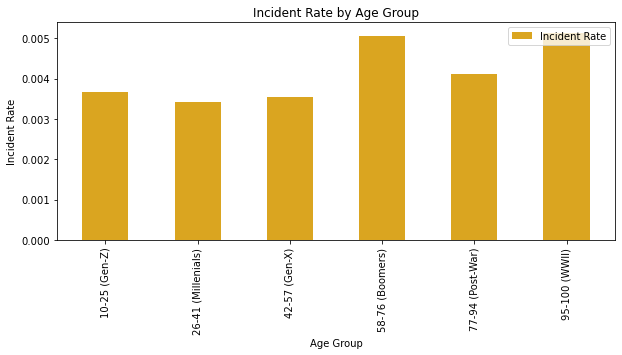

In [14]:
# Set the length of x-axis and use list comprehension to return age as label 
age_group = age_group_report.groupby(["Age Group"])
fraud_rate = age_group['Incident Rate'].sum()
age = fraud_rate.keys()
x_axis = np.arange(len(age))
tick_locations = [value for value in age]

# Plot the data using bar chart, add tittle and labels (axis 1)
plt.figure(figsize=(10,4))
plt.bar(age, fraud_rate, color='goldenrod', width=0.5, align="center", label = 'Incident Rate')
plt.legend(loc='upper right')
plt.xticks(age, rotation='vertical')
plt.title('Incident Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Incident Rate')
plt.show()



In [15]:
# Clean the dataframe formatting.
age_group_report_formatted = age_group_report
age_group_report_formatted['Transaction Count'] = age_group_report['Transaction Count'].map("{:,.0f}".format)
age_group_report_formatted['Average Spending Per Transaction'] = age_group_report['Average Spending Per Transaction'].map("${:,.0f}".format)
age_group_report_formatted['Total Spending'] = age_group_report['Total Spending'].map("${:,.0f}".format)
age_group_report_formatted['Fraudulent Transaction Count'] = age_group_report['Fraudulent Transaction Count'].map("{:,.0f}".format)
age_group_report_formatted['Fraudulent Transaction Value'] = age_group_report['Fraudulent Transaction Value'].map("${:,.0f}".format)
age_group_report_formatted['Fraud Value Per Victim'] = age_group_report['Fraud Value Per Victim'].map("${:,.2f}".format)
age_group_report_formatted['Victim Rate'] = age_group_report['Victim Rate'].map("{:,.2f}%".format)
age_group_report_formatted['Incident Rate'] = age_group_report['Incident Rate'].map("{:,.4f}%".format)
age_group_report_formatted

,Unique User Count,Transaction Count,Average Spending Per Transaction,Total Spending,Fraudulent Transaction Count,Fraudulent Transaction Value,Credit Card Victim,Fraud Value Per Victim,Victim Rate,Incident Rate
Age Group,,,,,,,,,,
10-25 (Gen-Z),53,"41,818",$61,"$2,570,666",153,"$93,134",12,"$7,761.20",0.23%,0.0037%
26-41 (Millenials),275,"185,175",$73,"$13,564,597",635,"$313,536",63,"$4,976.77",0.23%,0.0034%
42-57 (Gen-X),280,"177,926",$71,"$12,650,996",630,"$313,403",66,"$4,748.54",0.24%,0.0035%
58-76 (Boomers),229,"110,315",$65,"$7,162,981",557,"$315,733",58,"$5,443.67",0.25%,0.0050%
77-94 (Post-War),82,"37,566",$64,"$2,422,014",155,"$88,383",17,"$5,199.00",0.21%,0.0041%
95-100 (WWII),5,"2,919",$66,"$191,649",15,"$9,135",2,"$4,567.31",0.40%,0.0051%


## New Data Frame by Credit Card Holder

In [16]:
# Create a base data frame grouped by credit card holder
user = data_renamed.groupby(["Credit Card No.","Last Name","First Name","Gender","Age","State","City"])
user_spending_total = user['Amount'].sum()
user_transaction = user['Transaction No.'].nunique()
user_ave_spending = user['Amount'].mean()
user_table = pd.DataFrame({"Total Spending": user_spending_total,
                          "Transaction Count": user_transaction,
                          "Average Spending" : user_ave_spending})
user_table.head()

,,,,,,,Total Spending,Transaction Count,Average Spending
Credit Card No.,Last Name,First Name,Gender,Age,State,City,,,
60416207185,Diaz,Mary,F,36,WY,Fort Washakie,45086.65,678,66.499484
60422928733,Powers,Jeffrey,M,80,SC,North Augusta,38422.75,669,57.433109
60423098130,Gray,Jason,M,63,OK,Amorita,12451.92,228,54.613684
60427851591,Martinez,Bradley,M,45,OK,Burns Flat,20733.64,215,96.435535
60487002085,White,David,M,49,MS,Jackson,21951.13,239,91.845732


In [17]:
# Create a fraud-specific data frame grouped by credit card holder
user_fraud_data = data_renamed.loc[data_renamed['Fraud Tagging'] == 1]
user_fraud = user_fraud_data.groupby(["Credit Card No.","Last Name","First Name","Gender","Age","State","City"])
fraud_spending_total = user_fraud['Amount'].sum()
fraud_transaction = user_fraud['Transaction No.'].nunique()
fraud_ave_spending = user_fraud['Amount'].mean()
fraud_user_table = pd.DataFrame({"Fraud Total": fraud_spending_total,
                          "Fraud Count": fraud_transaction,
                          "Average Fraud Value" : fraud_ave_spending})
fraud_user_table['Victim'] = 1
fraud_user_table.head()

,,,,,,,Fraud Total,Fraud Count,Average Fraud Value,Victim
Credit Card No.,Last Name,First Name,Gender,Age,State,City,,,,
60487002085,White,David,M,49,MS,Jackson,5610.80,8,701.350000,1
60495593109,Dillon,Randall,M,79,TX,Dallas,6824.70,12,568.725000,1
501882822387,Phillips,Melissa,F,61,MS,Meadville,6807.45,12,567.287500,1
503851367360,Hall,Bruce,M,64,NC,Grifton,4729.57,10,472.957000,1
570273151375,Edwards,Peter,M,57,GA,Allentown,7934.88,13,610.375385,1


In [18]:
# Merge base and fraud specific data into a new data frame
cc_holder = pd.merge(user_table, fraud_user_table, how="left", on=["Credit Card No.","Last Name","First Name","Gender","Age","State","City"], )
cc_holder_clean = cc_holder.fillna(0)
cc_df = cc_holder_clean.reset_index(drop=False)
cc_df.head()

,Credit Card No.,Last Name,First Name,Gender,Age,State,City,Total Spending,Transaction Count,Average Spending,Fraud Total,Fraud Count,Average Fraud Value,Victim
0,60416207185,Diaz,Mary,F,36,WY,Fort Washakie,45086.65,678,66.499484,0.0,0.0,0.00,0.0
1,60422928733,Powers,Jeffrey,M,80,SC,North Augusta,38422.75,669,57.433109,0.0,0.0,0.00,0.0
2,60423098130,Gray,Jason,M,63,OK,Amorita,12451.92,228,54.613684,0.0,0.0,0.00,0.0
3,60427851591,Martinez,Bradley,M,45,OK,Burns Flat,20733.64,215,96.435535,0.0,0.0,0.00,0.0
4,60487002085,White,David,M,49,MS,Jackson,21951.13,239,91.845732,5610.8,8.0,701.35,1.0


In [19]:
# Sum check, must equal to 38562903.11 (data validation)
cc_df['Total Spending'].sum()

38562903.11

In [20]:
# Create bins to stratify the age group by generation
# Gen Z = 10-25 | Millenials = 26-41 | Gen X = 42-57 | Boomers = 58-76 | Post War = 77-94 |WWII = 95-100

bins = [0, 25, 41, 57, 76, 94, 100]
age_groups = ["10-25 (Gen-Z)", "26-41 (Millenials)", "42-57 (Gen-X)", 
             "58-76 (Boomers)", "77-94 (Post-War)", "95-100 (WWII)"]

cc_df['Age Group'] = pd.cut(cc_df['Age'], bins, labels=age_groups, 
                               include_lowest=True)

cc_df.head()

,Credit Card No.,Last Name,First Name,Gender,Age,State,City,Total Spending,Transaction Count,Average Spending,Fraud Total,Fraud Count,Average Fraud Value,Victim,Age Group
0,60416207185,Diaz,Mary,F,36,WY,Fort Washakie,45086.65,678,66.499484,0.0,0.0,0.00,0.0,26-41 (Millenials)
1,60422928733,Powers,Jeffrey,M,80,SC,North Augusta,38422.75,669,57.433109,0.0,0.0,0.00,0.0,77-94 (Post-War)
2,60423098130,Gray,Jason,M,63,OK,Amorita,12451.92,228,54.613684,0.0,0.0,0.00,0.0,58-76 (Boomers)
3,60427851591,Martinez,Bradley,M,45,OK,Burns Flat,20733.64,215,96.435535,0.0,0.0,0.00,0.0,42-57 (Gen-X)
4,60487002085,White,David,M,49,MS,Jackson,21951.13,239,91.845732,5610.8,8.0,701.35,1.0,42-57 (Gen-X)


In [21]:
# Create a summary by age group
cc_age = cc_df.groupby(['Age Group']) 
cc_spending = cc_age['Total Spending'].sum()
cc_count = cc_age['Credit Card No.'].count()
cc_ave = cc_age['Total Spending'].sum() / cc_age['Transaction Count'].sum()
cc_fraud_rate = cc_age['Fraud Count'].sum() / cc_age['Transaction Count'].sum()
cc_final_df = pd.DataFrame({"Total Spending": cc_spending,
                          "Average Spending": cc_ave,
                          "% Fraud Incident": cc_fraud_rate,
                           "Unique User": cc_count})

cc_final_df

,Total Spending,Average Spending,% Fraud Incident,Unique User
Age Group,,,,
10-25 (Gen-Z),2570665.82,61.472711,0.003659,53
26-41 (Millenials),13564597.03,73.252853,0.003429,275
42-57 (Gen-X),12650996.06,71.102571,0.003541,280
58-76 (Boomers),7162981.28,64.932070,0.005049,229
77-94 (Post-War),2422013.77,64.473560,0.004126,82
95-100 (WWII),191649.15,65.655755,0.005139,5


## Observations and Insights - Victim Age Group vs. Spending Analysis (User-Level)

Our analysis shows that the **rate of fraud incidents are higher on credit card users aging from 58-100** (*Boomers, Post-War and WWII*) and does not appear to correlate with the average spending (per person).  The result supports the premise that older people have wealthier financial status.  Further, older people tend to be more trusting and forgetful, which make them more vulnerable and more susceptible target. 

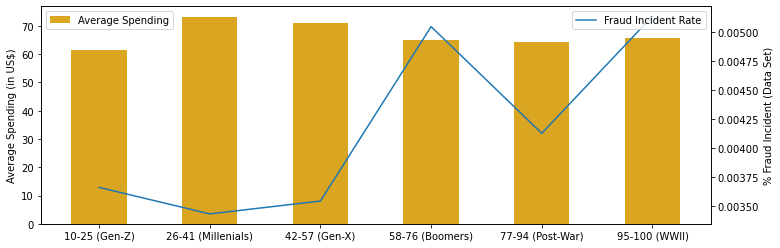

In [22]:
# Create figure and axis #3
fig, ax3 = plt.subplots(figsize = (12,4))

# plot line chart on axis #3
cc_age = cc_df.groupby(['Age Group']) 
cc_fraud_rate = cc_age['Fraud Count'].sum() / cc_age['Transaction Count'].sum()
cc_ave = cc_age['Total Spending'].sum() / cc_age['Transaction Count'].sum()
ax3.bar(age, cc_ave, width=0.5, color='goldenrod')
ax3.set_ylabel('Average Spending (in US$)')
ax3.legend(['Average Spending'], loc="upper left")

# set up the axis #4
ax4 = ax3.twinx()

# plot bar chart on axis #4
ax4.plot(age, cc_fraud_rate) 
ax4.grid(False) # turn off grid #2
ax4.set_ylabel('% Fraud Incident (Data Set)')
ax4.legend(['Fraud Incident Rate'], loc="upper right")
plt.show()


**Note:** The graph below shows the **total spending vs. fraud incident rate** but **must not be used** as the data set is not reasonably distributed across generations.  The data set appears to have more users in 26-57 categories hence distorting the graph of total spending.

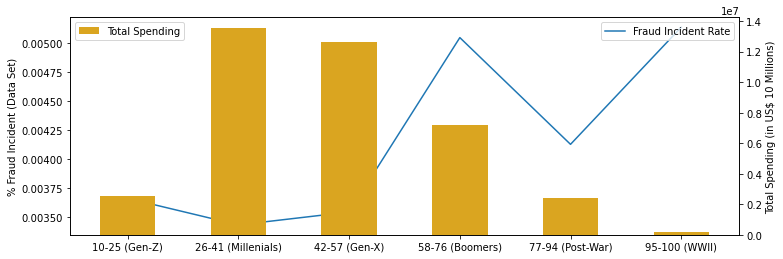

Age Group
10-25 (Gen-Z)          53
26-41 (Millenials)    275
42-57 (Gen-X)         280
58-76 (Boomers)       229
77-94 (Post-War)       82
95-100 (WWII)           5
Name: Credit Card No., dtype: int64

In [23]:
# Create figure and axis #5
fig, ax5 = plt.subplots(figsize = (12,4))

# plot line chart on axis #6
cc_age = cc_df.groupby(['Age Group']) 
cc_fraud_rate = cc_age['Fraud Count'].sum() / cc_age['Transaction Count'].sum()
cc_spending = cc_age['Total Spending'].sum()
ax5.plot(age, cc_fraud_rate) 
ax5.set_ylabel('% Fraud Incident (Data Set)')
ax5.legend(['Fraud Incident Rate'], loc="upper right")

# set up the axis #6
ax6 = ax5.twinx()

# plot bar chart on axis #6
ax6.bar(age, cc_spending, width=0.5, color='goldenrod')
ax6.grid(False) # turn off grid #2
ax6.set_ylabel('Total Spending (in US$ 10 Millions)')
ax6.legend(['Total Spending'], loc="upper left")
plt.show()

cc_count

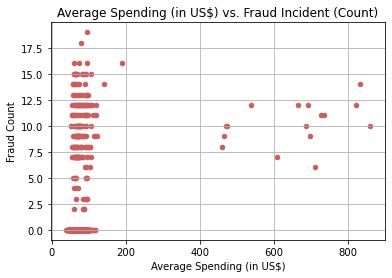

In [24]:
# Generate a scatter plot of spending by age group vs. fraudulent incidents
cc = cc_df.groupby(['Credit Card No.']) 
user_ave = cc['Total Spending'].sum() / cc['Transaction Count'].sum()
user_fraud_cnt = cc['Fraud Count'].sum()

# Create a new dataframe that contains only the average tumor volume and mouse size by mouse
final_analysis = pd.DataFrame({'Average Spending (in US$)' : user_ave,'Fraud Count' : user_fraud_cnt })
final_analysis.plot(kind='scatter', x='Average Spending (in US$)', y='Fraud Count',
                  grid=True, color ='indianred',
                  title = 'Average Spending (in US$) vs. Fraud Incident (Count)')
plt.show()

## Weak Correlation Between Victim's Average Spending and Fraud Incident Count

The r-value is: 0.28096259621376307
The r-squared is :0.07893998047117808


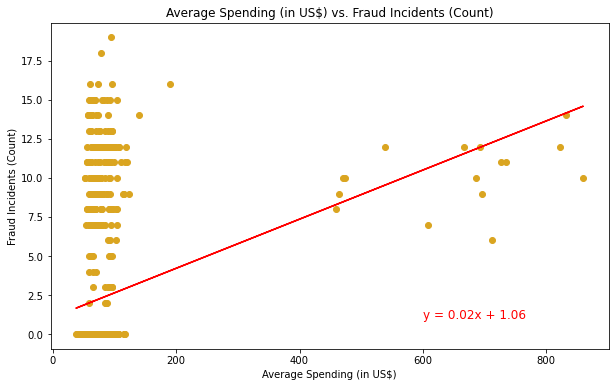

In [25]:
# Calculate linear regression
y_values = user_fraud_cnt
x_values = user_ave
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'The r-value is: {rvalue}')

# Plot the linear regression in a scotter plot with labels and annotation
plt.subplots(figsize=(10,6))
plt.scatter(x_values,y_values, color ='goldenrod',label='Fraud Incidents')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(600,1),fontsize=12,color="red")
plt.xlabel('Average Spending (in US$)')
plt.ylabel('Fraud Incidents (Count)')
plt.title('Average Spending (in US$) vs. Fraud Incidents (Count)')
print(f"The r-squared is :{rvalue**2}")
plt.show()


## Correlation Between Victim's Age and Fraud Incident Count

The r-value is: -0.1703936088540223


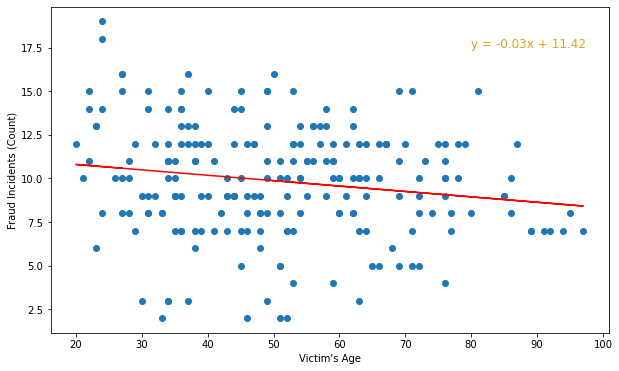

In [26]:
# Generate a scatter plot of spending by age group vs. fraudulent incidents
cc_victim = cc_df.loc[cc_df['Victim']==1]
# Generate a scatter plot of spending by age group vs. fraudulent incidents
cc1 = cc_victim.groupby(['Age Group']) 
user_fraud1 = cc1['Victim'].sum()
user_count1 = cc1['Victim'].count()

# Calculate linear regression
y_values = cc_victim['Fraud Count']
x_values = cc_victim['Age']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'The r-value is: {rvalue}')

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = cc_victim['Age'], y = cc_victim['Fraud Count'])
plt.xlabel("Victim's Age")
plt.ylabel("Fraud Incidents (Count)")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(80,17.5),fontsize=12,color="goldenrod")
plt.show()

## Average Individual Spending (TX, NY, PA)

In [27]:
cc_df2 = cc_df[['Credit Card No.','Average Spending','Total Spending']]

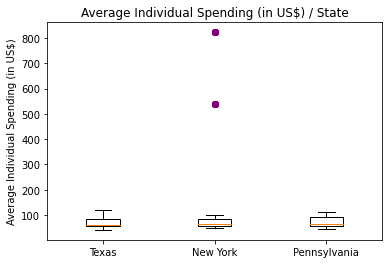

In [28]:
# Generate a box plot of the average spending of each user for top three cities with highest fraud incidents
data_states = pd.merge(data_renamed, cc_df2, how="outer", on=["Credit Card No."] )
tx = data_states.loc[data_states['State']=='TX']
tx_spend = tx['Average Spending']
nyc = data_states.loc[data_states['State']=='NY']
nyc_spend = nyc['Average Spending']
pa = data_states.loc[data_states['State']=='PA']
pa_spend = pa['Average Spending']

data = [tx_spend, nyc_spend, pa_spend]
labels = ['Texas', 'New York', 'Pennsylvania']
flierprops = dict(marker='o', markerfacecolor='purple', 
                  linestyle='none', markeredgecolor='purple')
plt.boxplot(data, flierprops=flierprops, labels=labels)
plt.title('Average Individual Spending (in US$) / State')
plt.ylabel('Average Individual Spending (in US$)')
plt.show()


## Actual Individual Spending (TX, NY, PA)

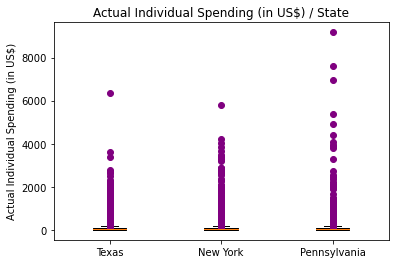

In [29]:
# Generate a box plot of the actual spending of each user for top three cities with highest fraud incidents
data_states = pd.merge(data_renamed, cc_df2, how="outer", on=["Credit Card No."] )
tx = data_states.loc[data_states['State']=='TX']
tx_spend = tx['Amount']
nyc = data_states.loc[data_states['State']=='NY']
nyc_spend = nyc['Amount']
pa = data_states.loc[data_states['State']=='PA']
pa_spend = pa['Amount']

data = [tx_spend, nyc_spend, pa_spend]
labels = ['Texas', 'New York', 'Pennsylvania']
flierprops = dict(marker='o', markerfacecolor='purple', 
                  linestyle='none', markeredgecolor='purple')
plt.boxplot(data, flierprops=flierprops, labels=labels)
plt.title('Actual Individual Spending (in US$) / State')
plt.ylabel('Actual Individual Spending (in US$)')
plt.show()

## Credit Card User Spending Outlier (TX, NY, PA)

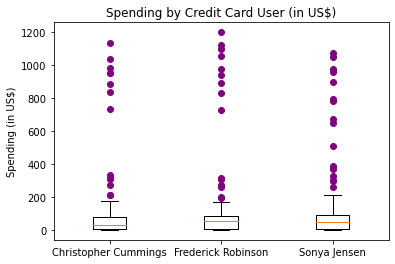

In [30]:
# Generate a box plot each three sample credit card user spending and identify outliers
sample_user1 =675961917837
sample_user2 =30510856607165
sample_user3 =38014427445058

sample1 = data_renamed.loc[data_renamed['Credit Card No.'] == sample_user1,:]
sample1_spend = sample1['Amount']

sample2 = data_renamed.loc[data_renamed['Credit Card No.'] == sample_user2,:]
sample2_spend = sample2['Amount']

sample3 = data_renamed.loc[data_renamed['Credit Card No.'] == sample_user3,:]
sample3_spend = sample3['Amount']

# Generate a box plot of the average spending of each user for top three cities with highest fraud incidents
data = [sample1_spend, sample2_spend, sample3_spend]
labels = ['Christopher Cummings', 'Frederick Robinson', 'Sonya Jensen']
flierprops = dict(marker='o', markerfacecolor='purple', 
                  linestyle='none', markeredgecolor='purple')
plt.boxplot(data, flierprops=flierprops, labels=labels)
plt.title('Spending by Credit Card User (in US$)')
plt.ylabel('Spending (in US$)')
plt.show()


## Research Question:

### 1. Is there any relationship between locations and credit card fraud?
Based on the previous statistics data for 2020:"Population sizes play a large role in which states have the most identity theft credit card fraud." https://www.fool.com/the-ascent/research/identity-theft-credit-card-fraud-statistics/.  California has the highest number of identity theft incidences (of which credit card fraud is the most typical), and Georgia has the most cases per capita, according to a 2019 Federal Trade Commission report.
<br>
### Hypothesis 1. Big cities that have larger population tend to have higher incidents of credit card fraud.

In [31]:
# Create a new dataframe for fraud data
fraud_df = data_renamed.loc[data_renamed["Fraud Tagging"]==1]
fraud_df.head()

,Transaction Date Time Stamp,Credit Card No.,Merchant,Category,Amount,First Name,Last Name,Gender,Street Address,City,...,City Population,Job,Date of Birth,Transaction No.,Unix Time Stamp,Merchant Latitude,Merchant Longtitude,Fraud Tagging,Age,Age Group
1685,2020-06-21 22:06:39,3560725013359375,fraud_Hamill-D'Amore,health_fitness,24.84,Brooke,Smith,F,63542 Luna Brook Apt. 012,Notrees,...,23,Cytogeneticist,09/15/1969,16bf2e46c54369a8eab2214649506425,1371852399,32.575873,-102.604290,1,52,42-57 (Gen-X)
1767,2020-06-21 22:32:22,6564459919350820,"fraud_Rodriguez, Yost and Jenkins",misc_net,780.52,Douglas,Willis,M,619 Jeremy Garden Apt. 681,Benton,...,1306,Public relations officer,09/10/1958,ab4b379d2c0c9c667d46508d4e126d72,1371853942,42.461127,-91.147148,1,63,58-76 (Boomers)
1781,2020-06-21 22:37:27,6564459919350820,fraud_Nienow PLC,entertainment,620.33,Douglas,Willis,M,619 Jeremy Garden Apt. 681,Benton,...,1306,Public relations officer,09/10/1958,47a9987ae81d99f7832a54b29a77bf4b,1371854247,42.771834,-90.158365,1,63,58-76 (Boomers)
1784,2020-06-21 22:38:55,4005676619255478,"fraud_Heathcote, Yost and Kertzmann",shopping_net,1077.69,William,Perry,M,458 Phillips Island Apt. 768,Denham Springs,...,71335,Herbalist,05/31/1994,fe956c7e4a253c437c18918bf96f7b62,1371854335,31.204974,-90.261595,1,27,26-41 (Millenials)
1857,2020-06-21 23:02:16,3560725013359375,fraud_Hermann and Sons,shopping_pos,842.65,Brooke,Smith,F,63542 Luna Brook Apt. 012,Notrees,...,23,Cytogeneticist,09/15/1969,f6838c01f5d2262006e6b71d33ba7c6d,1371855736,31.315782,-102.736390,1,52,42-57 (Gen-X)


In [32]:
# Groupby cities to get the data related to fraud, city locations and city population 

# Get the fraud incidents by city
city_df=fraud_df.groupby(["City"])["Fraud Tagging"].value_counts(sort=False) 
city_df

City        Fraud Tagging
Adams       1                12
Afton       1                 7
Akron       1                 9
Allentown   1                13
Andrews     1                 5
                             ..
Whittemore  1                15
Williams    1                 9
Wilton      1                11
Woodville   1                10
Zavalla     1                12
Name: Fraud Tagging, Length: 215, dtype: int64

In [33]:
# Get the city population for each city

new_df=fraud_df.groupby(["City"])["City Population"].max()
city_fraud=new_df.reset_index()
city_fraud 

,City,City Population
0,Adams,3508
1,Afton,937
2,Akron,272134
3,Allentown,112
4,Andrews,2304
...,...,...
210,Whittemore,912
211,Williams,1735
212,Wilton,1190
213,Woodville,3395


In [34]:
# Merge the city population and fraud incidents table
population_city_df=pd.merge(city_fraud,city_df, on="City",how="outer")
population_city_df.head()

,City,City Population,Fraud Tagging
0,Adams,3508,12
1,Afton,937,7
2,Akron,272134,9
3,Allentown,112,13
4,Andrews,2304,5


In [35]:
fraud_df.dtypes

Transaction Date Time Stamp      object
Credit Card No.                   int64
Merchant                         object
Category                         object
Amount                          float64
First Name                       object
Last Name                        object
Gender                           object
Street Address                   object
City                             object
State                            object
zip                               int64
Lat                             float64
Lng                             float64
City Population                   int64
Job                              object
Date of Birth                    object
Transaction No.                  object
Unix Time Stamp                   int64
Merchant Latitude               float64
Merchant Longtitude             float64
Fraud Tagging                     int64
Age                               int64
Age Group                      category
dtype: object

In [36]:
# Get the victim's city lat and long and the locations of fraud incidents
location1=fraud_df.groupby("City")["Lat"].max()
location2=fraud_df.groupby("City")["Lng"].max()
location3=fraud_df.groupby("City")["Merchant Latitude"].max()
location4=fraud_df.groupby("City")["Merchant Longtitude"].max()
location1_merged=pd.merge(location1,location2,on="City",how="outer")
location2_merged=pd.merge(location3,location4,on="City",how="outer")
location_merged=pd.merge(location1_merged,location2_merged,on="City",how="outer")
location_reset=location_merged.reset_index()
location_reset.head()

,City,Lat,Lng,Merchant Latitude,Merchant Longtitude
0,Adams,43.8967,-89.8219,44.574122,-88.938528
1,Afton,45.3637,-84.4695,46.215658,-83.694248
2,Akron,41.0695,-81.5488,41.894724,-80.741660
3,Allentown,32.6064,-83.2095,33.551444,-82.261276
4,Andrews,40.8618,-85.6067,41.493207,-84.865560


In [37]:
# Create a final dataframe for heatmap
population_location=pd.merge(population_city_df,location_reset,on="City",how="outer" )
population_location.head()

,City,City Population,Fraud Tagging,Lat,Lng,Merchant Latitude,Merchant Longtitude
0,Adams,3508,12,43.8967,-89.8219,44.574122,-88.938528
1,Afton,937,7,45.3637,-84.4695,46.215658,-83.694248
2,Akron,272134,9,41.0695,-81.5488,41.894724,-80.741660
3,Allentown,112,13,32.6064,-83.2095,33.551444,-82.261276
4,Andrews,2304,5,40.8618,-85.6067,41.493207,-84.865560


In [38]:
# Plot heatmap to see the concentration of victims' locations
gmaps.configure(api_key=gkey)
locations=population_location[["Lat","Lng"]]
fraudnumber=population_location["Fraud Tagging"]
fig=gmaps.figure(map_type="TERRAIN")
heat_layer=gmaps.heatmap_layer(locations,weights=fraudnumber,
                              dissipating=False, max_intensity=10,
                              point_radius=1)
# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [39]:
# Sort the city by city population, to find the top three cities that have higher city populaiton
max_population=population_city_df["City Population"].max()
print(f"The max value of city population is {max_population}")
min_population=population_city_df["City Population"].min()
print(f"The minimun value of city population is {min_population}")
population_city_df.sort_values("City Population", ascending=False).head(3)

The max value of city population is 1577385
The minimun value of city population is 23


,City,City Population,Fraud Tagging
130,New York City,1577385,12
145,Phoenix,1312922,15
44,Dallas,1263321,12


The correlation coefficient between city population and fraud is (0.06900267483096204, 0.3138960929551441)
The r-squared is :0.004761369133827495


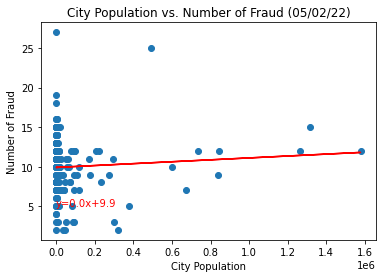

In [40]:
# Plot the correlation between city population and fraud incidents
x_values=population_city_df["City Population"]
y_values=population_city_df["Fraud Tagging"]

# Using linregress from scipy.stats
(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))
correlation=st.pearsonr(x_values,y_values)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0.8,5),color="red")
plt.title("City Population vs. Number of Fraud (%s)" % time.strftime("%x"))
plt.xlabel("City Population")
plt.ylabel("Number of Fraud")
print(f"The correlation coefficient between city population and fraud is {correlation}")
print(f"The r-squared is :{rvalue**2}")
plt.show()


##  Hypothesis 1 Results: 

Based on the analysis of our dataset, there is no correlation between city population size and credit card fraud incidents. The r-squared shows that the result can not explain the relationship.   The **hypothesis 1** that *big cities that have larger population tend to have higher incidences of credit card* is **rejected**.

### Hypothesis 2. States that have larger population size tend to have higher incidents of credit card fraud.

In [41]:
# Create a sub-dataset gouped by state
state_grouped = fraud_df.groupby(["State"])["Fraud Tagging"].value_counts(sort=True)

state_spendingsize = fraud_df.groupby(["State"])["Amount"].sum()

state_merged=pd.merge(state_grouped,state_spendingsize,on="State",how="outer")
state_merged["Percentage Fraud"]= state_merged["Fraud Tagging"] * 100 / state_merged["Fraud Tagging"].sum()
state_df=state_merged.reset_index()

# Sort the data, to get the top three states that have high fraud incidences
sorted_fraud=state_df.sort_values("Fraud Tagging", ascending=False)
sorted_fraud.head(3)

,State,Fraud Tagging,Amount,Percentage Fraud
32,NY,175,99746.68,8.158508
36,PA,114,62807.61,5.314685
40,TX,113,52310.40,5.268065


The top three states with highest fraud incidents are **NY, PA**, and **TX**.

## Census API

In [42]:
# Run census search to retrieve data on all states
# Note the addition of "B23025_005E" for unemployment count
census_data = c.acs5.get(("NAME", "B19013_001E", "B01003_001E", "B01002_001E",
                          "B19301_001E",
                          "B17001_002E",
                          "B23025_005E"), {'for': 'state:*'})

# Convert to dataframe
census_pd = pd.DataFrame(census_data)

# Column reordering
census_pd = census_pd.rename(columns={"B01003_001E": "Population",
                                      "B01002_001E": "Median Age",
                                      "B19013_001E": "Household Income",
                                      "B19301_001E": "Per Capita Income",
                                      "B17001_002E": "Poverty Count",
                                      "B23025_005E": "Unemployment Count",
                                      "NAME": "Name", "state": "State"})

# Add in poverty rate (poverty count / population)
census_pd["Poverty Rate"] = 100 * \
    census_pd["Poverty Count"].astype(
        int) / census_pd["Population"].astype(int)

# Add in employment rate (employment count / population)
census_pd["Unemployment Rate"] = 100 * \
    census_pd["Unemployment Count"].astype(
        int) / census_pd["Population"].astype(int)

# Final dataframe
census_pd = census_pd[["State", "Name", "Population", "Median Age", "Household Income",
                       "Per Capita Income", "Poverty Count", "Poverty Rate", "Unemployment Rate"]]

census_pd.head()

,State,Name,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate
0,42,Pennsylvania,12794885.0,40.9,63627.0,35518.0,1480430.0,11.570483,2.745222
1,06,California,39346023.0,36.7,78672.0,38576.0,4853434.0,12.335259,3.123769
2,54,West Virginia,1807426.0,42.7,48037.0,27346.0,300152.0,16.606600,2.878735
3,49,Utah,3151239.0,31.1,74197.0,30986.0,283360.0,8.992019,1.835119
4,36,New York,19514849.0,39.0,71117.0,40898.0,2581048.0,13.226072,2.923774


In [43]:
print(f'In the census data, there are {len(census_pd)} states.')

In the census data, there are 52 states.


### Combine the sub-dataset for states and the census data
1. There are 45 states in the sub-dataset and 52 states in census data
2. Abbreviation of states in the sub-dataset and full names in census data

In [44]:
# Create the dictionary of full names and abbreviation for each state
statename_to_abbr = {
    # Other
    'District of Columbia': 'DC',

    # States
    'Alabama': 'AL',
    'Montana': 'MT',
    'Alaska': 'AK',
    'Nebraska': 'NE',
    'Arizona': 'AZ',
    'Nevada': 'NV',
    'Arkansas': 'AR',
    'New Hampshire': 'NH',
    'California': 'CA',
    'New Jersey': 'NJ',
    'Colorado': 'CO',
    'New Mexico': 'NM',
    'Connecticut': 'CT',
    'New York': 'NY',
    'Delaware': 'DE',
    'North Carolina': 'NC',
    'Florida': 'FL',
    'North Dakota': 'ND',
    'Georgia': 'GA',
    'Ohio': 'OH',
    'Hawaii': 'HI',
    'Oklahoma': 'OK',
    'Idaho': 'ID',
    'Oregon': 'OR',
    'Illinois': 'IL',
    'Pennsylvania': 'PA',
    'Indiana': 'IN',
    'Rhode Island': 'RI',
    'Iowa': 'IA',
    'South Carolina': 'SC',
    'Kansas': 'KS',
    'South Dakota': 'SD',
    'Kentucky': 'KY',
    'Tennessee': 'TN',
    'Louisiana': 'LA',
    'Texas': 'TX',
    'Maine': 'ME',
    'Utah': 'UT',
    'Maryland': 'MD',
    'Vermont': 'VT',
    'Massachusetts': 'MA',
    'Virginia': 'VA',
    'Michigan': 'MI',
    'Washington': 'WA',
    'Minnesota': 'MN',
    'West Virginia': 'WV',
    'Mississippi': 'MS',
    'Wisconsin': 'WI',
    'Missouri': 'MO',
    'Wyoming': 'WY',
}

In [45]:
# Find the key and value of states in the sub-dataset, and create new dataframe to combine the two dataframes 
key_list = list(statename_to_abbr.keys())
val_list = list(statename_to_abbr.values())
i=0
df = pd.DataFrame(columns = ['Population','Median Age','Household Income','Per Capita Income',\
                             'Poverty Count','Poverty Rate','Unemployment Rate'])
for i in range(len(state_df)):
    position = val_list.index(state_df["State"][i])
    ds = census_pd["Name"]
    x = ds[ds == key_list[position]].index[0]
    df = df.append({'Population':census_pd["Population"][x],\
                    'Median Age':census_pd["Median Age"][x],\
                    'Household Income':census_pd["Household Income"][x],\
                    'Per Capita Income':census_pd["Per Capita Income"][x],\
                    'Poverty Count':census_pd["Poverty Count"][x],\
                    'Poverty Rate':census_pd["Poverty Rate"][x],\
                    'Unemployment Rate':census_pd["Unemployment Rate"][x]},\
                    ignore_index = True)

fraud_census = pd.concat([state_df, df], axis=1, join='inner')
fraud_census    

,State,Fraud Tagging,Amount,Percentage Fraud,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate
0,AK,14,11641.22,0.652681,736990.0,34.6,77790.0,37094.0,74369.0,10.090910,3.586073
1,AL,63,36474.51,2.937063,4893186.0,39.2,52035.0,28934.0,762642.0,15.585796,2.561583
2,AR,34,16605.22,1.585082,3011873.0,38.3,49475.0,27724.0,470190.0,15.611216,2.380711
3,AZ,27,14119.83,1.258741,7174064.0,37.9,61529.0,32340.0,990528.0,13.807069,2.778871
4,CA,76,34995.06,3.543124,39346023.0,36.7,78672.0,38576.0,4853434.0,12.335259,3.123769
5,CO,2,150.04,0.093240,5684926.0,36.9,75231.0,39545.0,544232.0,9.573247,2.510534
6,CT,40,17977.25,1.864802,3570549.0,41.1,79855.0,45668.0,339156.0,9.498707,3.255354
7,DC,10,6640.64,0.466200,701974.0,34.1,90842.0,58659.0,103391.0,14.728608,4.172519
8,FL,53,22734.52,2.470862,21216924.0,42.2,57703.0,32848.0,2772939.0,13.069468,2.621082
9,GA,58,33619.50,2.703963,10516579.0,36.9,61224.0,32427.0,1461572.0,13.897789,2.771871


The correlation coefficient between state population and percentage_fraud is (0.5939270221773396, 1.7012169853977487e-05)
The r-squared is :0.35274930767244195
The r-value is :0.5939270221773395


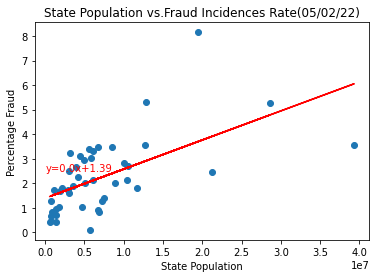

In [46]:
# Correlation between state population and percentage of fraud
x_values=fraud_census["Population"]
y_values=fraud_census["Percentage Fraud"]
# using linregress from scipy.stats
(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))
correlation=st.pearsonr(x_values,y_values)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(3.0,2.5),color="red")
plt.title("State Population vs.Fraud Incidences Rate(%s)" % time.strftime("%x"))
plt.xlabel("State Population")
plt.ylabel("Percentage Fraud")
print(f"The correlation coefficient between state population and percentage_fraud is {correlation}")
print(f"The r-squared is :{rvalue**2}")
print(f"The r-value is :{rvalue}")
plt.show()


##  Hypothesis 2 Results: 

The r value 0.59 indicates that state polulation is positively correlated with the number of fraud incidences. The r-squared shows that the number of fraud incidents can be explained at 35% of the variance by the state population in the regression model. The **hypothesis 2** is **accepted**.

### Socioeconomic status (measured by poverty rate,unemployment rate, household income,	per capita income) is positively or negatively correlated with credit card fraud incidents rate.  

### Hypothesis 3a Poverty rate is positively correlated with credit card fraud incidents rate.

The correlation coefficient between poverty rate and fraud incidents is (0.15441884405064088, 0.31114870168065645)
The r-squared is :0.023845179397936147


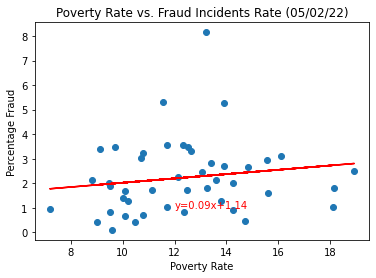

In [47]:
# Correlate poverty rate and fraud incident rate
x_values=fraud_census["Poverty Rate"]
y_values=fraud_census["Percentage Fraud"]

# Use linregress from scipy.stats
(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))
correlation=st.pearsonr(x_values,y_values)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(12,1),color="red")
plt.title("Poverty Rate vs. Fraud Incidents Rate (%s)" % time.strftime("%x"))
plt.xlabel("Poverty Rate")
plt.ylabel("Percentage Fraud")
print(f"The correlation coefficient between poverty rate and fraud incidents is {correlation}")
print(f"The r-squared is :{rvalue**2}")
plt.show()

##  Hypothesis 3a Results: 

Based on the analysis of our dataset, the correlation between povety rate and credit card fraud incident rate. The r-squared shows that the result can not explain the relationship.The **hypothesis 3a** is **rejected**.

### Hypothesis 3b Unemployment rate is positively correlated with credit card fraud incidents rate.

The correlation coefficient between unemployment rate and fraud is (0.06465200169484829, 0.6730714556206687)
The r-squared is :0.004179881323150668


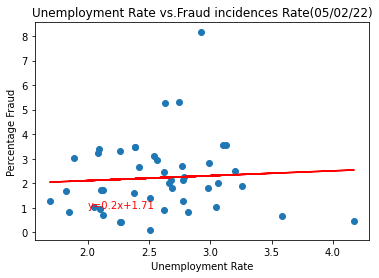

In [48]:
# Correlation between unemployment rate and percentage fraud
x_values=fraud_census["Unemployment Rate"]
y_values=fraud_census["Percentage Fraud"]

# Using linregress from scipy.stats
(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))
correlation=st.pearsonr(x_values,y_values)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2.0,1),color="red")
plt.title("Unemployment Rate vs.Fraud incidences Rate(%s)" % time.strftime("%x"))
plt.xlabel("Unemployment Rate")
plt.ylabel("Percentage Fraud")
print(f"The correlation coefficient between unemployment rate and fraud is {correlation}")
print(f"The r-squared is :{rvalue**2}")
plt.show()

##  Hypothesis 3b Results: 

Based on the analysis of our dataset, the correlation between unemployment rate and credit card fraud incident rate. The r-squared shows that the result can not explain the relationship.The **hypothesis 3b** is **rejected**.

### Hypothesis 3c Household income is negatively correlated with credit card fraud incidents rate.

The correlation coefficient between Household Income and fraud incidences is (-0.11243119350502423, 0.46214218157102943)
The r-squared is :0.012640773272964206


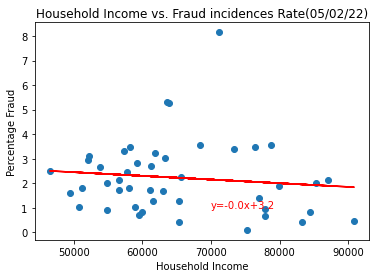

In [49]:
# Correlation between household income and percentage fraud.
x_values=fraud_census["Household Income"]
y_values=fraud_census["Percentage Fraud"]

# Use linregress from scipy.stats
(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))
correlation=st.pearsonr(x_values,y_values)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(70000,1),color="red")
plt.title("Household Income vs. Fraud incidences Rate(%s)" % time.strftime("%x"))
plt.xlabel("Household Income")
plt.ylabel("Percentage Fraud")
print(f"The correlation coefficient between Household Income and fraud incidences is {correlation}")
print(f"The r-squared is :{rvalue**2}")
plt.show()

##  Hypothesis 3c Results: 

Based on the analysis of our dataset, the correlation between household income and credit card fraud incident rate. The r-squared shows that the result can not explain the relationship.The **hypothesis 3c** is **rejected**.

### Hypothesis 3d Per capita income is negatively correlated with credit card fraud incidents rate.

The correlation coefficient between Per Capita Income and fraud is (-0.07854832687251433, 0.608032298861484)
The r-squared is :0.006169839654471365


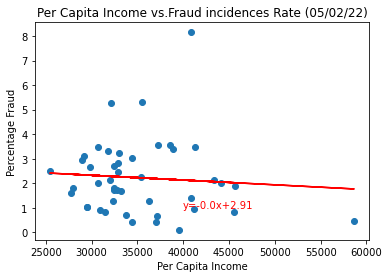

In [50]:
# Correlation between per capita income and percentage fraud
x_values=fraud_census["Per Capita Income"]
y_values=fraud_census["Percentage Fraud"]

# Use linregress from scipy.stats
(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))
correlation=st.pearsonr(x_values,y_values)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40000,1),color="red")
plt.title("Per Capita Income vs.Fraud incidences Rate (%s)" % time.strftime("%x"))
plt.xlabel("Per Capita Income")
plt.ylabel("Percentage Fraud")
print(f"The correlation coefficient between Per Capita Income and fraud is {correlation}")
print(f"The r-squared is :{rvalue**2}")
plt.show()

##  Hypothesis 3d Results: 

Based on the analysis of our dataset, the correlation between per capita income and credit card fraud incident rate. The r-squared shows that the result can not explain the relationship.The **hypothesis 3d** is **rejected**.

## Relationship b/w Shopping Category & Fraud Incidents

In [51]:
# The relationship between shopping category and fraud.
category_count=fraud_df["Category"].value_counts()
category_count

shopping_net      506
grocery_pos       485
misc_net          267
shopping_pos      213
gas_transport     154
misc_pos           72
personal_care      70
home               67
kids_pets          65
entertainment      59
food_dining        54
health_fitness     52
grocery_net        41
travel             40
Name: Category, dtype: int64

"On an hour-by-hour basis, identity fraud thieves start early, as early as 1 AM EST, to target workers in Europe before they get to the workplace, and continue on to focus on U.S. workers with spam activity. Their work is usually done by 4 PM EST." https://www.experian.com/blogs/ask-experian/dont-let-id-thieves-ruin-your-birthday-or-any-other-day/

### Hypothesis 4 Fraud incidents are perpetrated during night time and early morning.

In [52]:
# Return the time stamp's month and hour
fraud_df.at[:,'Transaction Date Time Stamp']=pd.to_datetime(fraud_df['Transaction Date Time Stamp'])
fraud_df.at[:,'Hour']=fraud_df['Transaction Date Time Stamp'].dt.hour
fraud_df.at[:,'Month']=fraud_df['Transaction Date Time Stamp'].dt.month
fraud_df.head()

,Transaction Date Time Stamp,Credit Card No.,Merchant,Category,Amount,First Name,Last Name,Gender,Street Address,City,...,Date of Birth,Transaction No.,Unix Time Stamp,Merchant Latitude,Merchant Longtitude,Fraud Tagging,Age,Age Group,Hour,Month
1685,2020-06-21 22:06:39,3560725013359375,fraud_Hamill-D'Amore,health_fitness,24.84,Brooke,Smith,F,63542 Luna Brook Apt. 012,Notrees,...,09/15/1969,16bf2e46c54369a8eab2214649506425,1371852399,32.575873,-102.604290,1,52,42-57 (Gen-X),22,6
1767,2020-06-21 22:32:22,6564459919350820,"fraud_Rodriguez, Yost and Jenkins",misc_net,780.52,Douglas,Willis,M,619 Jeremy Garden Apt. 681,Benton,...,09/10/1958,ab4b379d2c0c9c667d46508d4e126d72,1371853942,42.461127,-91.147148,1,63,58-76 (Boomers),22,6
1781,2020-06-21 22:37:27,6564459919350820,fraud_Nienow PLC,entertainment,620.33,Douglas,Willis,M,619 Jeremy Garden Apt. 681,Benton,...,09/10/1958,47a9987ae81d99f7832a54b29a77bf4b,1371854247,42.771834,-90.158365,1,63,58-76 (Boomers),22,6
1784,2020-06-21 22:38:55,4005676619255478,"fraud_Heathcote, Yost and Kertzmann",shopping_net,1077.69,William,Perry,M,458 Phillips Island Apt. 768,Denham Springs,...,05/31/1994,fe956c7e4a253c437c18918bf96f7b62,1371854335,31.204974,-90.261595,1,27,26-41 (Millenials),22,6
1857,2020-06-21 23:02:16,3560725013359375,fraud_Hermann and Sons,shopping_pos,842.65,Brooke,Smith,F,63542 Luna Brook Apt. 012,Notrees,...,09/15/1969,f6838c01f5d2262006e6b71d33ba7c6d,1371855736,31.315782,-102.736390,1,52,42-57 (Gen-X),23,6


In [53]:
hour_counts=fraud_df["Hour"].value_counts()
hour_counts

22    550
23    538
3     194
0     188
1     169
2     168
20     36
18     30
21     27
19     24
15     21
16     21
5      20
11     17
12     17
17     16
7      16
4      15
13     14
14     14
6      14
9      14
10     12
8      10
Name: Hour, dtype: int64

In [54]:
# Create a bin to stratify the hours and create a datafrime by time range
bins_hour=[0,6,12,18,24]
time_labels=["Early Morning/Late Night (0-6)","Morning (6-12)","Afternoon (12-18)","Night (18-24)"]                                                      
fraud_df["Time"] = pd.cut(fraud_df["Hour"], bins_hour,labels=time_labels)
fraud_grouped=fraud_df.groupby("Time").count()
fraud_time=fraud_grouped.loc[:,["Fraud Tagging"]]
fraud_time["Percentage Fraud"] = round(fraud_time["Fraud Tagging"]*100/fraud_time["Fraud Tagging"].sum(),2)
fraud_time

,Fraud Tagging,Percentage Fraud
Time,,
Early Morning/Late Night (0-6),580,29.64
Morning (6-12),86,4.39
Afternoon (12-18),116,5.93
Night (18-24),1175,60.04


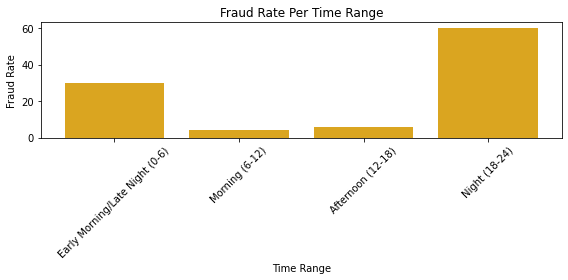

In [55]:
# Generate a bar plot showing the total number of fraud incidents for each time range.

# Set x axis and tick locations and figure size
x_axis=np.arange(len(fraud_time))
tick_locations=[value for value in x_axis]
plt.figure(figsize=(8,4))
plt.bar(x_axis,fraud_time["Percentage Fraud"],color='goldenrod',align='center')
plt.xticks(tick_locations,time_labels, rotation=45)
plt.title("Fraud Rate Per Time Range")
plt.xlabel("Time Range")
plt.ylabel("Fraud Rate")

#Save our graph and show the grap

plt.tight_layout()
# plt.savefig("Images/fraud_time.png")

plt.show()

##  Hypothesis 4 Results: 

Based on the analysis of our dataset, night time and early morning tend to have higher credit card fraud incidents.The **hypothesis 4** is **accepted**.

## Purchase Category Analysis

In [56]:
# Rename the credit card puchase category
data_renamed1= data_renamed.loc[data_renamed['Fraud Tagging']==1,:]
data_renamed1.head()

,Transaction Date Time Stamp,Credit Card No.,Merchant,Category,Amount,First Name,Last Name,Gender,Street Address,City,...,City Population,Job,Date of Birth,Transaction No.,Unix Time Stamp,Merchant Latitude,Merchant Longtitude,Fraud Tagging,Age,Age Group
1685,2020-06-21 22:06:39,3560725013359375,fraud_Hamill-D'Amore,health_fitness,24.84,Brooke,Smith,F,63542 Luna Brook Apt. 012,Notrees,...,23,Cytogeneticist,09/15/1969,16bf2e46c54369a8eab2214649506425,1371852399,32.575873,-102.604290,1,52,42-57 (Gen-X)
1767,2020-06-21 22:32:22,6564459919350820,"fraud_Rodriguez, Yost and Jenkins",misc_net,780.52,Douglas,Willis,M,619 Jeremy Garden Apt. 681,Benton,...,1306,Public relations officer,09/10/1958,ab4b379d2c0c9c667d46508d4e126d72,1371853942,42.461127,-91.147148,1,63,58-76 (Boomers)
1781,2020-06-21 22:37:27,6564459919350820,fraud_Nienow PLC,entertainment,620.33,Douglas,Willis,M,619 Jeremy Garden Apt. 681,Benton,...,1306,Public relations officer,09/10/1958,47a9987ae81d99f7832a54b29a77bf4b,1371854247,42.771834,-90.158365,1,63,58-76 (Boomers)
1784,2020-06-21 22:38:55,4005676619255478,"fraud_Heathcote, Yost and Kertzmann",shopping_net,1077.69,William,Perry,M,458 Phillips Island Apt. 768,Denham Springs,...,71335,Herbalist,05/31/1994,fe956c7e4a253c437c18918bf96f7b62,1371854335,31.204974,-90.261595,1,27,26-41 (Millenials)
1857,2020-06-21 23:02:16,3560725013359375,fraud_Hermann and Sons,shopping_pos,842.65,Brooke,Smith,F,63542 Luna Brook Apt. 012,Notrees,...,23,Cytogeneticist,09/15/1969,f6838c01f5d2262006e6b71d33ba7c6d,1371855736,31.315782,-102.736390,1,52,42-57 (Gen-X)


In [57]:
data_renamed1['Category'] = data_renamed1['Category'].replace({'shopping_net':'Online', 'grocery_pos':'POS-Grocery', 
        'misc_net':'Online', 'shopping_pos':'POS-Shopping','gas_transport':'Gas', 
        'misc_pos':'POS-Misc', 'personal_care':'Personal Care', 'home':'Home', 'kids_pets':'Kids-Pets',
       'entertainment':'Entertainment', 'food_dining':'Food', 'health_fitness':'Health', 'grocery_net':'Grocery Online',
       'travel':'Travel'})


In [58]:
data_renamed1["Category"].value_counts()

Online            773
POS-Grocery       485
POS-Shopping      213
Gas               154
POS-Misc           72
Personal Care      70
Home               67
Kids-Pets          65
Entertainment      59
Food               54
Health             52
Grocery Online     41
Travel             40
Name: Category, dtype: int64

In [59]:
city_pop = data_renamed1.groupby(["City"])["City Population"].mean()
city_pop

City
Adams           3508.0
Afton            937.0
Akron         272134.0
Allentown        112.0
Andrews         2304.0
                ...   
Whittemore       912.0
Williams        1735.0
Wilton          1190.0
Woodville       3395.0
Zavalla         2836.0
Name: City Population, Length: 215, dtype: float64

In [60]:
per_city_count = data_renamed1.groupby(["City"])["Fraud Tagging"].count()
per_city_count

City
Adams         12
Afton          7
Akron          9
Allentown     13
Andrews        5
              ..
Whittemore    15
Williams       9
Wilton        11
Woodville     10
Zavalla       12
Name: Fraud Tagging, Length: 215, dtype: int64

In [61]:
# Determine the NY population
NY_df = data_renamed1.loc[(data_renamed["State"]=="NY")]
ny_p = NY_df.groupby(["City"])["City Population"].unique()
NY_Total_Pop = ny_p.sum()
ny_p

City
Chatham              [4015]
Cottekill             [722]
Falconer             [3833]
Farmington          [10717]
Kirkwood             [3800]
New York City     [1577385]
Northport           [21902]
Orient                [743]
Oriskany Falls       [1970]
Pomona               [9993]
Port Ewen            [2471]
Port Gibson           [207]
Springville          [7728]
West Eaton            [176]
West Harrison       [11250]
West Henrietta      [10256]
West Sayville        [4056]
Name: City Population, dtype: object

In [62]:
ny_p = ny_p.astype(int)
ny_p

City
Chatham              4015
Cottekill             722
Falconer             3833
Farmington          10717
Kirkwood             3800
New York City     1577385
Northport           21902
Orient                743
Oriskany Falls       1970
Pomona               9993
Port Ewen            2471
Port Gibson           207
Springville          7728
West Eaton            176
West Harrison       11250
West Henrietta      10256
West Sayville        4056
Name: City Population, dtype: int32

In [63]:
# Determine the NY fraud incidents
NY_incidents = NY_df["Fraud Tagging"].count()
NY_incidents

175

In [64]:
ny_i = NY_df.groupby(["City"])["Fraud Tagging"].count()
ny_i

City
Chatham           16
Cottekill         15
Falconer          11
Farmington         9
Kirkwood          12
New York City     12
Northport         10
Orient             4
Oriskany Falls     5
Pomona            11
Port Ewen         13
Port Gibson        4
Springville       12
West Eaton        13
West Harrison      9
West Henrietta    11
West Sayville      8
Name: Fraud Tagging, dtype: int64

In [65]:
# Create a dataframe for NY city population and fraud incidents 
ny_i = NY_df.groupby(["City"])["Fraud Tagging"].count()
NY = pd.DataFrame({"City Population": ny_p,
                          "NY Fraud Incidents": ny_i,
                          })
NY

,City Population,NY Fraud Incidents
City,,
Chatham,4015,16
Cottekill,722,15
Falconer,3833,11
Farmington,10717,9
Kirkwood,3800,12
New York City,1577385,12
Northport,21902,10
Orient,743,4
Oriskany Falls,1970,5


In [66]:
# Correlation between population and numbers of fraud incidents in NY.
print(ny_p.corr(ny_i))

0.12665328457375313


In [67]:
# Create a dateframe PA population
PA_df = data_renamed1.loc[(data_renamed["State"]=="PA")]
pa_p = PA_df.groupby(["City"])["City Population"].unique()
PA_Total_Pop = pa_p.sum()
PA_Total_Pop

array([32143], dtype=int64)

In [68]:
# Count the number of PA fraud incidents
PA_incidents = PA_df["Fraud Tagging"].count()
PA_incidents

114

In [69]:
# Create a dataframe for PA city population and fraud incidents 
pa_i = PA_df.groupby(["City"])["Fraud Tagging"].count()
PA = pd.DataFrame({"City Population": pa_p,
                          "PA Fraud Incidents": pa_i,
                          })

PA

,City Population,PA Fraud Incidents
City,,
Bolivar,[1770],10
Bristol,[21125],15
Clarks Mills,[606],18
Cressona,[1606],11
Keisterville,[184],11
Leetsdale,[1140],11
Morrisdale,[3688],7
Spring Church,[972],8
Uledi,[328],13


In [70]:
pa_p = pa_p.astype(int)

In [71]:
# Correlation between population and numbers of fraud incidents in PA.
print(pa_p.corr(pa_i))

0.3035029480468111


In [72]:
# Create a dateframe TX population
TX_df = data_renamed1.loc[(data_renamed["State"]=="TX")]
tx_p = TX_df.groupby(["City"])["City Population"].unique()
TX_Total_Pop = tx_p.sum()
TX_Total_Pop

array([1343794], dtype=int64)

In [73]:
# Count the number of TX fraud incidents
TX_incidents = TX_df["Fraud Tagging"].count()
TX_incidents

113

In [74]:
# Create a dataframe for TX city population and fraud incidents 
tx_i = TX_df.groupby(["City"])["Fraud Tagging"].count()
TX = pd.DataFrame({"City Population": tx_p,
                          "TX Fraud Incidents": tx_i,
                          })
TX

,City Population,TX Fraud Incidents
City,,
Camden,[99],13
Dallas,[1263321],12
Dell City,[579],10
Desdemona,[407],9
Leonard,[4090],15
Lorenzo,[1571],12
Notrees,[23],2
Sachse,[20328],7
Sherman,[46563],2


In [75]:
tx_p = tx_p.astype(int)

In [76]:
# Correlation between population and numbers of fraud incidents in TX.
print(tx_p.corr(tx_i))

0.17367850432390589


## There is no correlation between the TX population and total numbers of fraud incidents.

The r-value is: 0.1736785043239059


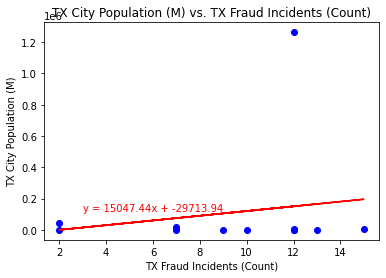

In [77]:
# Calculate linear regression
y_values = tx_p
x_values = tx_i
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'The r-value is: {rvalue}')

# Linear regression in a scatter plot
plt.scatter(x_values,y_values, color ='blue')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(3,120000),fontsize=10,color="red")
plt.rcParams['figure.figsize'] = [5, 10]
plt.xlabel('TX Fraud Incidents (Count)')
plt.ylabel('TX City Population (M)')
plt.title('TX City Population (M) vs. TX Fraud Incidents (Count)')
plt.show()


In [78]:
data_renamed_category = data_renamed1["Category"].value_counts()
data_renamed_category

Online            773
POS-Grocery       485
POS-Shopping      213
Gas               154
POS-Misc           72
Personal Care      70
Home               67
Kids-Pets          65
Entertainment      59
Food               54
Health             52
Grocery Online     41
Travel             40
Name: Category, dtype: int64

In [79]:
myexplode=(0.1,0.1,0.1,0,0,0,0,0,0,0,0,0,0)

## Pie Chart:  Credit Card Fraud Purchase Categories

<AxesSubplot:title={'center':'Fraud Purchase Categories'}, ylabel='Category'>

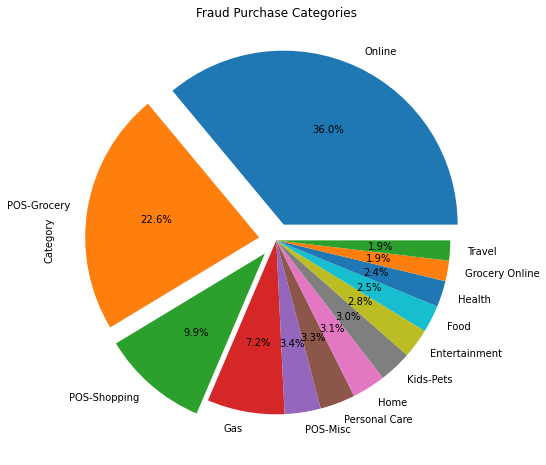

In [80]:
data_renamed_category.plot(kind='pie', title = "Fraud Purchase Categories" , figsize = (8, 8), 
                          autopct='%1.1f%%', explode=myexplode)

In [81]:
top_categories = data_renamed1.loc[(data_renamed1["Category"]=="POS-Grocery") | (data_renamed1["Category"]=="Online")|
                                 (data_renamed1["Category"]=="POS-Shopping")]
top_categories.describe()

,Credit Card No.,Amount,zip,Lat,Lng,City Population,Unix Time Stamp,Merchant Latitude,Merchant Longtitude,Fraud Tagging,Age
count,1.471000e+03,1471.000000,1471.000000,1471.000000,1471.000000,1.471000e+03,1.471000e+03,1471.000000,1471.000000,1471.0,1471.000000
mean,2.905052e+17,719.660673,47089.743032,39.144750,-90.182536,7.148801e+04,1.379723e+09,39.144368,-90.194102,1.0,51.434398
std,1.112453e+18,304.940960,26455.149583,5.069785,14.253694,2.302319e+05,4.539845e+06,5.096090,14.267587,0.0,18.343907
min,6.048700e+10,241.450000,1257.000000,20.082700,-155.488000,2.300000e+01,1.371854e+09,19.161782,-156.480766,1.0,20.000000
25%,3.055164e+13,333.610000,22719.000000,35.375700,-95.968500,1.139000e+03,1.375841e+09,35.427519,-95.992037,1.0,36.000000
50%,2.284059e+15,825.630000,47110.000000,39.991400,-87.823500,3.289000e+03,1.379815e+09,39.853239,-87.587920,1.0,52.000000
75%,4.173950e+15,970.060000,65066.000000,42.284800,-79.473600,1.542600e+04,1.383531e+09,42.299243,-79.694040,1.0,64.000000
max,4.989848e+18,1320.920000,99921.000000,55.473200,-67.950300,1.577385e+06,1.387754e+09,56.134886,-67.503251,1.0,97.000000


In [82]:
cat_amo_df = pd.DataFrame(data_renamed1.groupby(["Category"])["Amount"].sum())
cat_amo_df

,Amount
Category,
Entertainment,30076.17
Food,6607.54
Gas,1848.42
Grocery Online,478.39
Health,1058.32
Home,17260.30
Kids-Pets,1288.45
Online,717866.88
POS-Grocery,151866.72


In [83]:
data_renamed1["Amount"].describe()

count    2145.000000
mean      528.356494
std       392.747594
min         1.780000
25%       214.510000
50%       371.940000
75%       907.770000
max      1320.920000
Name: Amount, dtype: float64

## Total Amount per Category

The graphic shows that scammers concentrate the fradus in: online shoppings and point of sales (POS). 

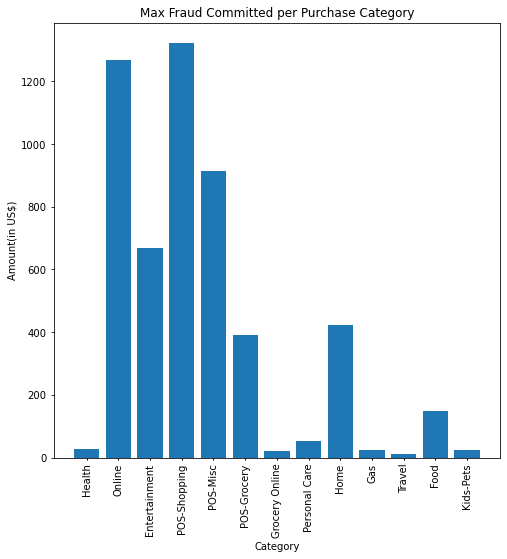

In [84]:
x = data_renamed1["Category"]
y = data_renamed1["Amount"]
plt.figure(figsize=(8,8))
plt.tick_params(axis='x', colors='black', length=2, width=1, rotation=90)
plt.title('Max Fraud Committed per Purchase Category')
plt.xlabel("Category")
plt.ylabel('Amount(in US$)')
plt.bar(x, y)
plt.show()

In [85]:
Num_Incidents = data_renamed1.groupby(["City"])["Fraud Tagging"].count()
Num_Incidents

City
Adams         12
Afton          7
Akron          9
Allentown     13
Andrews        5
              ..
Whittemore    15
Williams       9
Wilton        11
Woodville     10
Zavalla       12
Name: Fraud Tagging, Length: 215, dtype: int64

In [86]:
Pop = data_renamed1.groupby(["City"])["City Population"].unique()
Pop

City
Adams           [3508]
Afton            [937]
Akron         [272134]
Allentown        [112]
Andrews         [2304]
                ...   
Whittemore       [912]
Williams        [1735]
Wilton          [1190]
Woodville       [3395]
Zavalla         [2836]
Name: City Population, Length: 215, dtype: object

In [87]:
Num_Incidents = data_renamed1.groupby(["City"])["Fraud Tagging"].count()
Pop = data_renamed1.groupby(["City"])["City Population"].unique()

Corr_Inc_Pob = pd.DataFrame({"City Population": city_pop,
                          "Fraud Incidents": Num_Incidents,
                          })
Corr_Inc_Pob

,City Population,Fraud Incidents
City,,
Adams,3508.0,12
Afton,937.0,7
Akron,272134.0,9
Allentown,112.0,13
Andrews,2304.0,5
...,...,...
Whittemore,912.0,15
Williams,1735.0,9
Wilton,1190.0,11


In [88]:
print(city_pop.corr(Num_Incidents))

0.04247512428325422


## Low Correlation between City Population and Number of Fraud Incidents

The r-value is: 0.04247512428325423


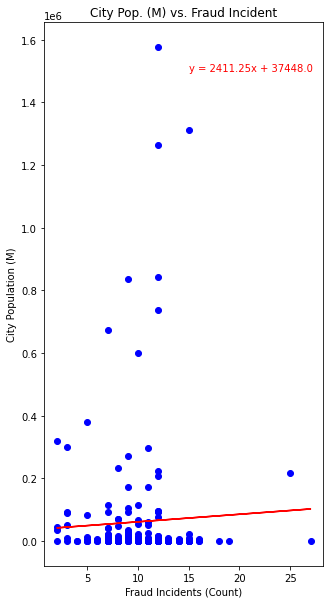

In [89]:
# Calculate linear regression
y_values = city_pop
x_values = Num_Incidents
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'The r-value is: {rvalue}')

# Linear regression in a scatter plot
plt.scatter(x_values,y_values, color ='blue')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,1500000),fontsize=10,color="red")
plt.xlabel('Fraud Incidents (Count)')
plt.ylabel('City Population (M)')
plt.title('City Pop. (M) vs. Fraud Incident')
plt.show()


In [90]:
lesst58age_df = data_renamed1.loc[(data_renamed["Age"]<58)]

In [91]:
#TX Dategrame Population
L58TX_df = lesst58age_df.loc[(lesst58age_df["State"]=="TX")]
L58tx_p = L58TX_df.groupby(["City"])["City Population"].unique()
L58TX_Total_Pop = tx_p.sum()
L58TX_Total_Pop

1343794

In [92]:
L58TX_incidents = L58TX_df["Fraud Tagging"].count()
L58TX_incidents

91

In [93]:
L58tx_i = L58TX_df.groupby(["City"])["Fraud Tagging"].count()

In [94]:
L58TX = pd.DataFrame({"City Population": L58tx_p,
                          "TX Fraud Incidents": L58tx_i,
                          })
L58TX

,City Population,TX Fraud Incidents
City,,
Camden,[99],13
Desdemona,[407],9
Leonard,[4090],15
Lorenzo,[1571],12
Notrees,[23],2
Sachse,[20328],7
Sherman,[46563],2
Thrall,[1766],12
Trenton,[2211],7


In [95]:
L58tx_p = L58tx_p.astype(int)

The r-value is: -0.5550576944186769


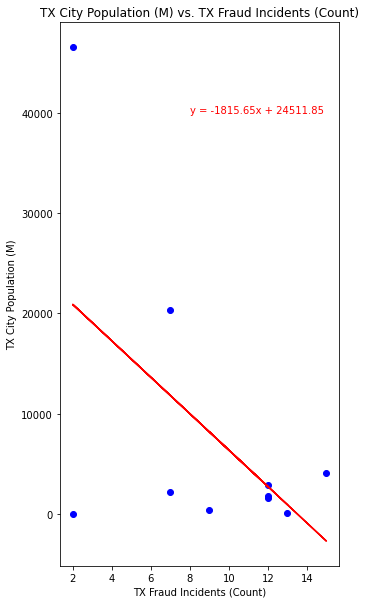

In [96]:
# Calculate linear regression
y_values = L58tx_p
x_values = L58tx_i
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'The r-value is: {rvalue}')

# Linear regression in a scatter plot
plt.scatter(x_values,y_values, color ='blue')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(8,40000),fontsize=10,color="red")
# plt.rcParams['figure.figsize'] = [5, 10]
plt.xlabel('TX Fraud Incidents (Count)')
plt.ylabel('TX City Population (M)')
plt.title('TX City Population (M) vs. TX Fraud Incidents (Count)')
plt.show()

In [97]:
moret58age_df = data_renamed1.loc[(fraud_df["Age"]>=58)]

In [98]:
#TX Dategrame Population
M58TX_df = moret58age_df.loc[(moret58age_df["State"]=="TX")]
M58tx_p = M58TX_df.groupby(["City"])["City Population"].unique()
M58TX_Total_Pop = tx_p.sum()
M58TX_Total_Pop

1343794

In [99]:
M58tx_p

City
Dallas       [1263321]
Dell City        [579]
Name: City Population, dtype: object

In [100]:
M58TX_incidents = M58TX_df["Fraud Tagging"].count()
M58TX_incidents

22

In [101]:
M58tx_i = M58TX_df.groupby(["City"])["Fraud Tagging"].count()

In [102]:
M58tx_p = M58tx_p.astype(int)

In [103]:
M58TX = pd.DataFrame({"City Population": M58tx_p,
                          "TX Fraud Incidents": M58tx_i,
                          })
M58TX

,City Population,TX Fraud Incidents
City,,
Dallas,1263321,12
Dell City,579,10


The r-value is: 1.0


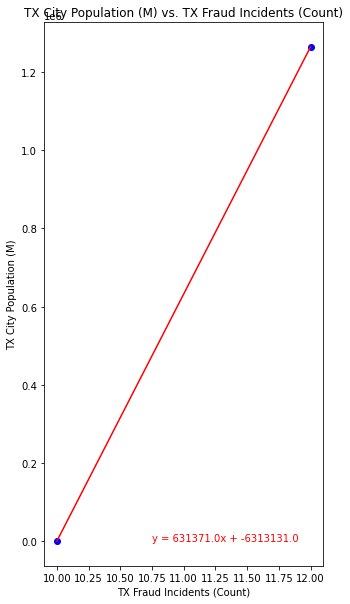

In [104]:
# Calculate linear regression
y_values = M58tx_p
x_values = M58tx_i
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'The r-value is: {rvalue}')

# Linear regression in a scatter plot
plt.scatter(x_values,y_values, color ='blue')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10.75,0.1),fontsize=10,color="red")
# plt.rcParams['figure.figsize'] = [5, 10]
plt.xlabel('TX Fraud Incidents (Count)')
plt.ylabel('TX City Population (M)')
plt.title('TX City Population (M) vs. TX Fraud Incidents (Count)')
plt.show()

In [105]:
from math import sin, cos, sqrt, atan2, radians

# approximate radius of earth in km
R = 6373.0

lat1 = radians(52.2296756)
lon1 = radians(21.0122287)
lat2 = radians(52.406374)
lon2 = radians(16.9251681)

dlon = lon2 - lon1
dlat = lat2 - lat1

a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
c = 2 * atan2(sqrt(a), sqrt(1 - a))

distance = R * c

print("Result:", distance)


Result: 278.54558935106695


In [106]:
Job_Fraud = data_renamed1["Job"].value_counts()
Job_Fraud

Science writer                 30
Systems developer              29
Licensed conveyancer           29
Engineer, biomedical           28
Colour technologist            27
                               ..
Child psychotherapist           4
Public relations officer        3
Commercial horticulturist       3
Clinical research associate     3
Pilot, airline                  2
Name: Job, Length: 177, dtype: int64

In [107]:
# Ocupation Vs Fraud Incidents
Job_Fraud_df = pd.DataFrame(data_renamed.groupby(["Job"])["Fraud Tagging"].count())
Job_Fraud_df.sort_values(by=['Fraud Tagging'],ascending=False)


,Fraud Tagging
Job,
Film/video editor,4119
Exhibition designer,3968
"Surveyor, land/geomatics",3756
Naval architect,3750
"Designer, ceramics/pottery",3463
...,...
Estate manager/land agent,195
"Engineer, civil (consulting)",194
Operational investment banker,11


In [108]:
count_fraud_job = (data_renamed1["Fraud Tagging"].count())
count_fraud_job

2145

In [109]:
plt.close()

In [110]:
def haversine_np(lat, long, merch_lat, merch_long):
    long, lat, merch_long, merch_lat = map(np.radians, [long, lat, merch_long, merch_lat])

    dlon = merch_long - long
    dlat = merch_lat - lat

    a = np.sin(dlat / 2.0) ** 2 + np.cos(lat) * np.cos(merch_lat) * np.sin(dlon / 2.0) ** 2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km
haversine_np(33.9659, -80.9355,33.986391, -81.200714)



24.54604093732707

In [111]:
data2['total_distance'] = data2.apply(lambda x: haversine_np(x['lat'], x['long'], x['merch_lat'], x['merch_long']), axis = 1)
data2.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,Age,total_distance
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,333497,Mechanical engineer,03/19/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,54,24.546041
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,302,"Sales professional, IT",01/17/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,32,104.859216
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,34496,"Librarian, public",10/21/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,51,59.042985
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,54767,Set designer,07/25/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,34,27.681177
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,1126,Furniture designer,07/06/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,66,104.269600


In [112]:
# look at mean for fraud vs. distance
stats = data2.groupby(['is_fraud'])['total_distance'].agg([np.mean, np.median, 'max', 'min'])
stats

,mean,median,max,min
is_fraud,,,,
0,76.056698,78.129833,150.827748,0.123805
1,76.166054,78.544024,142.760213,3.837209


In [113]:
distance = data2['total_distance']

In [114]:
fraud_cnt = data2['is_fraud']
total_count = len(data2)
fraud_incidence = (fraud_cnt/total_count) * 100
fraud_incidence

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
555714    0.0
555715    0.0
555716    0.0
555717    0.0
555718    0.0
Name: is_fraud, Length: 555719, dtype: float64

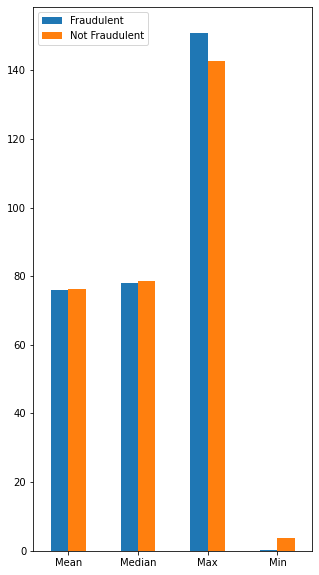

In [115]:
fraud = [76.056, 78.129, 150.827, 0.123]
not_fraud = [76.167, 78.544, 142.760, 3.837]
index = ['Mean', 'Median', 'Max',
         'Min']
df = pd.DataFrame({'Fraudulent': fraud,
                   'Not Fraudulent': not_fraud}, index=index)
ax = df.plot.bar(rot=0)